In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from scipy.optimize import curve_fit
from typing import Iterable
import csv

In [2]:
# data from https://ourworldindata.org/grapher/total-deaths-covid-19?time=2020-03-01..&country=OWID_WRL+USA+AUT+ITA

data = list()

with open('total-deaths-us-covid-19.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        # Entity, Code, Date, Total confirmed deaths due to COVID-19 (deaths)
        if row[1] == 'USA':
            date = row[2]
            value = int(row[3])
            if value != 0:
                data.append((date, value))

dates, values = zip(*data)
print(dates[-1] + ":", values[-1])

wdates = list(reversed(list(reversed(dates))[0:-1:7]))
wvalues = list(reversed(list(reversed(values))[0:-1:7]))
print(wdates[-1] + ":", wvalues[-1])

Jul 19, 2020: 140119
Jul 19, 2020: 140119


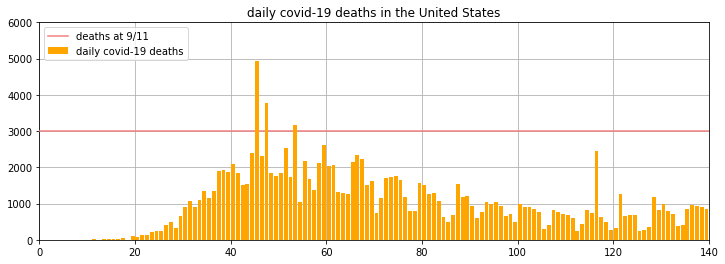

In [3]:
fig = plt.figure(figsize=(12,4))
fig.patch.set_facecolor('white')

plt.bar(np.arange(len(values)-1)+0.5, np.diff(values), color='orange', label='daily covid-19 deaths', zorder=10)
plt.plot([0, len(values)], [2996, 2996], color='lightcoral', label='deaths at 9/11', zorder=5)

plt.title("daily covid-19 deaths in the United States")
plt.ylim(0, 6000)
plt.xlim(0, len(values)-1)
plt.legend(loc='upper left')
plt.grid()

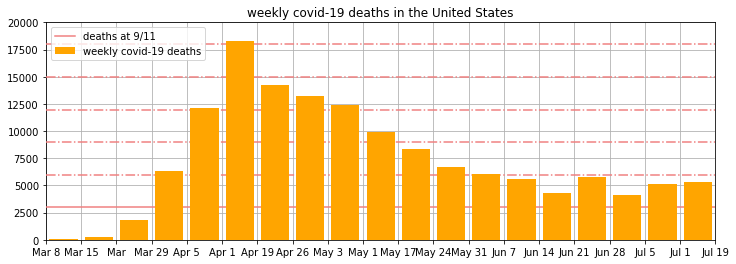

In [4]:
fig = plt.figure(figsize=(12,4))
fig.patch.set_facecolor('white')

plt.bar(np.arange(len(wvalues)-1)+0.5, np.diff(wvalues), color='orange', label='weekly covid-19 deaths', zorder=10)

plt.plot([0, len(wvalues)], [2996, 2996], color='lightcoral', label='deaths at 9/11', zorder=5)
for i in range(2, 7):
    plt.plot([0, len(wvalues)], [i*2996, i*2996], '-.', color='lightcoral', zorder=5)

plt.xticks(np.arange(0, len(wdates)), [d.rstrip(", 2020") for d in wdates])

plt.title("weekly covid-19 deaths in the United States")
plt.ylim(0, 20000)
plt.xlim(0, len(wvalues)-1)
plt.legend(loc='upper left')
plt.grid()

In [5]:
atdata = list()

with open('total-deaths-us-covid-19.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        # Entity, Code, Date, Total confirmed deaths due to COVID-19 (deaths)
        if row[1] == 'AUT':
            date = row[2]
            value = int(row[3])
            if date in dates:
                atdata.append((date, value))

atdates, atvalues = zip(*atdata)
print(atdates[-1] + ":", atvalues[-1])

watdates = list(reversed(list(reversed(atdates))[0:-1:7]))
watvalues = list(reversed(list(reversed(atvalues))[0:-1:7]))
print(watdates[-1] + ":", watvalues[-1])

Jul 19, 2020: 711
Jul 19, 2020: 711


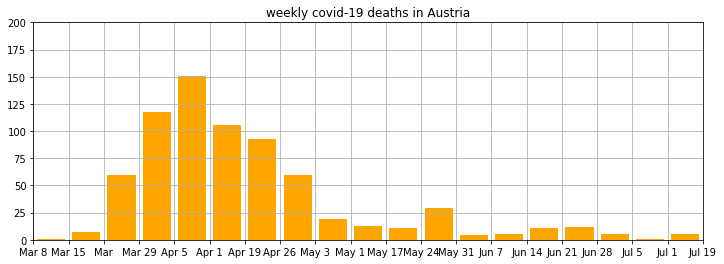

In [6]:
fig = plt.figure(figsize=(12,4))
fig.patch.set_facecolor('white')

plt.bar(np.arange(len(watvalues)-1)+0.5, np.diff(watvalues), color='orange')

plt.xticks(np.arange(0, len(watdates)), [d.rstrip(", 2020") for d in watdates])

plt.title("weekly covid-19 deaths in Austria")
plt.ylim(0, 200)
plt.xlim(0, len(watvalues)-1)
plt.grid()